In [ ]:
! pip install kaggle

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rahat52/traffic-density-singapore

 92% 204M/222M [00:01<00:00, 203MB/s]
100% 222M/222M [00:01<00:00, 191MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/traffic-density-singapore.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import re
import random
import glob
import cv2

In [ ]:
dataset_path = '/content/Final Dataset/training/Empty'

In [ ]:
!cd "/content/Final Dataset/training" && ls

 Empty	 High   Low   Medium  'Traffic Jam'


In [ ]:
# Get the list of image files in the dataset directory
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

In [ ]:
# Calculate the total number of images in the dataset
num_images = len(image_files)
print("Total number of images:", num_images)

Total number of images: 1186


## Visualising the images
## Empty Roads

In [ ]:
# Display a few sample images of empty roads
dir_path = "/content/Final Dataset/training/Empty"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/Final Dataset/training/Empty/be41dbd6-ac1c-445b-ad00-2ff5d3dc5434.jpg',
 '/content/Final Dataset/training/Empty/8a950792-2b7f-40d3-9f6e-8c577710d96d.jpg',
 '/content/Final Dataset/training/Empty/0497e997-d4dd-46f1-8af4-7bff76c7dce7.jpg',
 '/content/Final Dataset/training/Empty/bf6f6762-e750-443a-99af-72cd0d1c18d9.jpg']

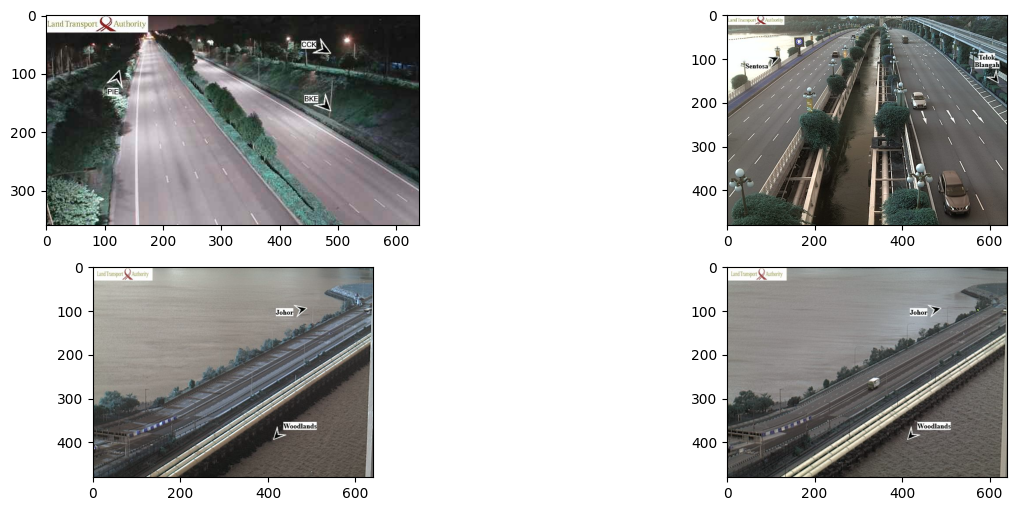

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the imgaes
## Low Traffic Roads

In [ ]:
# getting some visualisation of the Low traffic
dir_path = "/content/Final Dataset/training/Low"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/Final Dataset/training/Low/748f492e-c657-4ad2-bd86-40f08cde5f60.jpg',
 '/content/Final Dataset/training/Low/62253e20-1dbc-4eef-98d6-03d3bbe65c1c.jpg',
 '/content/Final Dataset/training/Low/179b4efa-9c9e-4b8a-900a-164b2d1bb703.jpg',
 '/content/Final Dataset/training/Low/97c52471-86b3-4f2a-af3f-917a95fbc77e.jpg']

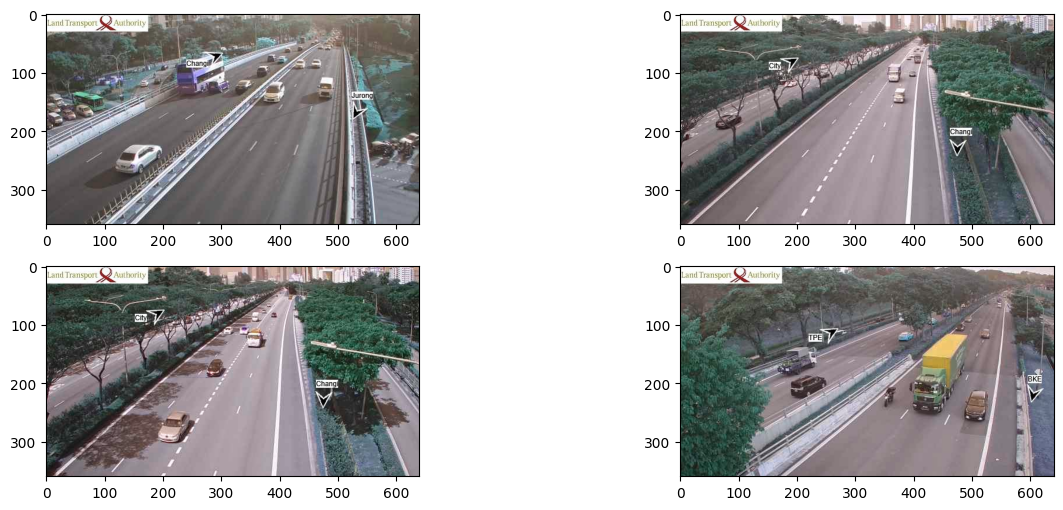

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the images with High traffic

In [ ]:
# with High traffic images data
dir_path = "/content/Final Dataset/training/High"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/Final Dataset/training/High/b06e6a4e-06e7-4f42-9bed-c3b661e2613a.jpg',
 '/content/Final Dataset/training/High/adfcc0e2-7456-4f30-b2b5-19e232146eeb.jpg',
 '/content/Final Dataset/training/High/ce50ae90-6d54-423c-86ca-dd9e5b17b5fe.jpg',
 '/content/Final Dataset/training/High/86eeaf06-e3cc-434d-882b-5f491f76d90f.jpg']

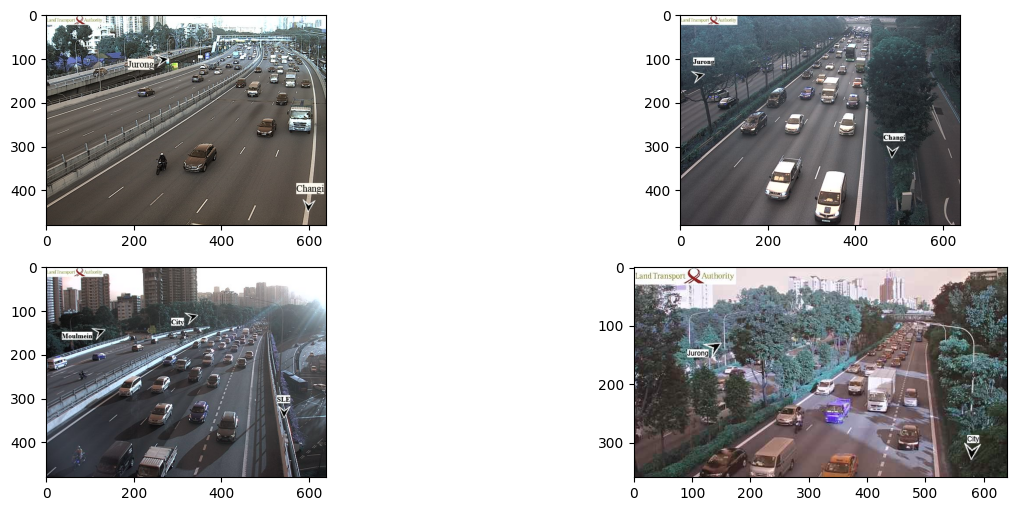

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

## Visualising the Traffic Jam data

In [ ]:
dir_path = "/content/Final Dataset/training/Traffic Jam"
images = os.listdir(dir_path)
img_paths = [os.path.join(dir_path, i) for i in images]

img_paths[:4]

['/content/Final Dataset/training/Traffic Jam/3fe7b7b5-c0e5-4a25-975e-ee90aea39167.jpg',
 '/content/Final Dataset/training/Traffic Jam/c73477ab-450e-41c4-831f-75676b952f2b.jpg',
 '/content/Final Dataset/training/Traffic Jam/f17c5553-bac6-44cf-95ce-20bd64728814.jpg',
 '/content/Final Dataset/training/Traffic Jam/f99a3d81-01b3-430f-a73e-6b918d626685.jpg']

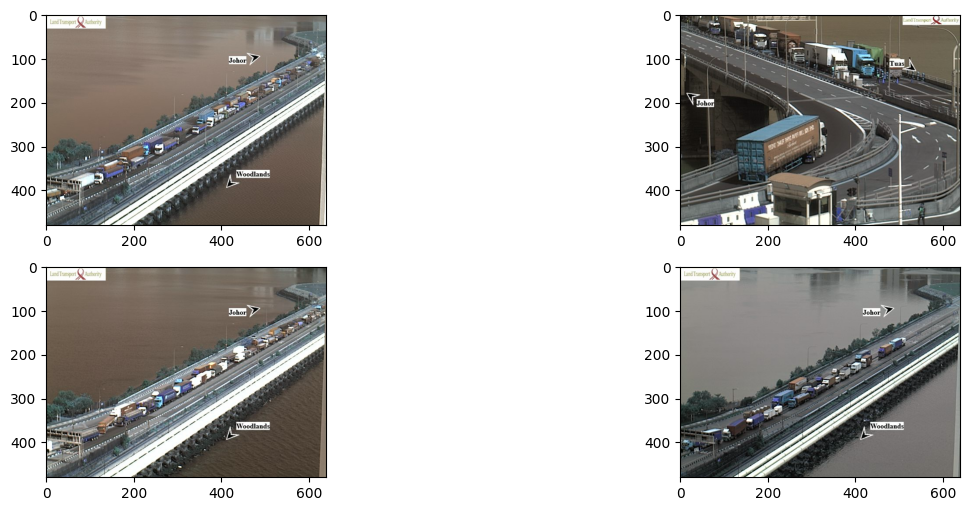

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
for a in ax.flatten():
    img = random.choice(img_paths)
    image = cv2.imread(img)
    a.imshow(image)

# Imgage processing

In [ ]:



import os
import cv2

main_directory = "/content/Final Dataset/training"

# List of classes
classes = ["Empty", "High", "Low", "Medium", "Traffic Jam"]

# Iterate over each class
for class_name in classes:
    class_directory = os.path.join(main_directory, class_name)

    # Iterate over each image in the class directory
    for filename in os.listdir(class_directory):
        if filename.endswith(".jpg"):
            image_path = os.path.join(class_directory, filename)

            # Load the image
            image = cv2.imread(image_path)

            if image is None:
                print(f"Failed to load image: {image_path}")
                continue

            # Convert the image to grayscale
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Save the grayscale image in the same directory as the original image
            output_path = os.path.join(class_directory, f"grayscale_{filename}")
            saved = cv2.imwrite(output_path, grayscale_image)

            if saved:
                print(f"Converted {filename} to grayscale and saved to {output_path}")
            else:
                print(f"Failed to save grayscale image: {output_path}")



Converted be41dbd6-ac1c-445b-ad00-2ff5d3dc5434.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_be41dbd6-ac1c-445b-ad00-2ff5d3dc5434.jpg
Converted 8a950792-2b7f-40d3-9f6e-8c577710d96d.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_8a950792-2b7f-40d3-9f6e-8c577710d96d.jpg
Converted 0497e997-d4dd-46f1-8af4-7bff76c7dce7.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_0497e997-d4dd-46f1-8af4-7bff76c7dce7.jpg
Converted bf6f6762-e750-443a-99af-72cd0d1c18d9.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_bf6f6762-e750-443a-99af-72cd0d1c18d9.jpg
Converted bb6abeda-bcba-454f-b425-1476c0973329.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_bb6abeda-bcba-454f-b425-1476c0973329.jpg
Converted 306cfff2-410a-405b-a516-2be485adf530.jpg to grayscale and saved to /content/Final Dataset/training/Empty/grayscale_306cfff2-410a-405b-a516-2be485adf530.jpg
Conv

# Note -
1 - All above code is for understanding how things working.

2 - Image Processing is important part, here converted all
    training images into grayscale images .so Directly work on new data .

.

# Preprocessing

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to the dataset directory containing grayscale images
dataset_directory = "/content/drive/MyDrive/New folder/training"

# List of classes
classes = ["Empty", "High", "Low", "Medium", "Traffic Jam"]

# Parameters for train-test-validation split
test_size = 0.2
val_size = 0.2
random_state = 42

# Preprocessing parameters
image_size = (64, 64)  # Specify the desired size for resizing

# List to store the preprocessed data and labels
data = []
labels = []

# Iterate over each class
for class_name in classes:
    class_directory = os.path.join(dataset_directory, class_name)

    # Iterate over each image in the class directory
    for filename in os.listdir(class_directory):
        if filename.endswith(".jpg"):
            image_path = os.path.join(class_directory, filename)

            # Load the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Preprocess the image (e.g., resize, normalization, etc.)
            resized_image = cv2.resize(image, image_size)

            # Normalize the image pixel values to the range [0, 1]
            normalized_image = resized_image / 255.0

            # Add the preprocessed image to the data list
            data.append(normalized_image)

            # Add the corresponding label to the labels list
            labels.append(class_name)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Perform train-test-validation split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_size, random_state=42)

# Print the shapes of the resulting datasets
print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)


Train data shape: (2728, 64, 64)
Train labels shape: (2728,)
Test data shape: (545, 64, 64)
Test labels shape: (545,)
Validation data shape: (137, 64, 64)
Validation labels shape: (137,)


In [5]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 43.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [6]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [7]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create label encoder object
label_encoder = LabelEncoder()

# Encode the string labels into numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Reshape the input data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)






Train on 2728 samples, validate on 137 samples
Epoch 1/10
2728/2728 [==============================] - ETA: 0s - loss: 1.2174 - accuracy: 0.4762

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


2728/2728 [==============================] - 29s 11ms/sample - loss: 1.2174 - accuracy: 0.4762 - val_loss: 0.8993 - val_accuracy: 0.6277
Epoch 2/10
2728/2728 [==============================] - 20s 7ms/sample - loss: 0.8117 - accuracy: 0.6807 - val_loss: 0.7887 - val_accuracy: 0.6861
Epoch 3/10
2728/2728 [==============================] - 19s 7ms/sample - loss: 0.6815 - accuracy: 0.7284 - val_loss: 0.6850 - val_accuracy: 0.7664
Epoch 4/10
2728/2728 [==============================] - 19s 7ms/sample - loss: 0.6033 - accuracy: 0.7566 - val_loss: 0.6426 - val_accuracy: 0.7226
Epoch 5/10
2728/2728 [==============================] - 24s 9ms/sample - loss: 0.5723 - accuracy: 0.7628 - val_loss: 0.7294 - val_accuracy: 0.7080
Epoch 6/10
2728/2728 [==============================] - 20s 7ms/sample - loss: 0.5179 - accuracy: 0.7947 - val_loss: 0.6454 - val_accuracy: 0.7591
Epoch 7/10
2728/2728 [==============================] - 20s 7ms/sample - loss: 0.5048 - accuracy: 0.7973 - val_loss: 0.6384 - va

Predicted Label: Empty


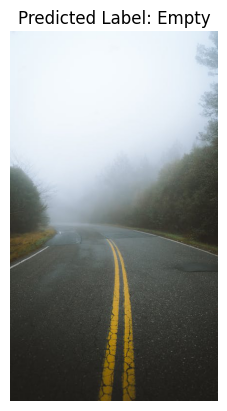

In [16]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Function to load and preprocess an image
def preprocess_image(image):
    resized_image = cv2.resize(image, (64, 64))
    normalized_image = resized_image / 255.0
    input_image = np.expand_dims(normalized_image, axis=0)
    input_image = np.expand_dims(input_image, axis=-1)
    return input_image

# Load the image from the internet
image_url = "https://images.pexels.com/photos/3876460/pexels-photo-3876460.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"  # Replace with the URL of the image you want to predict

try:
    response = requests.get(image_url)
    response.raise_for_status()  # Check for any HTTP errors

    image = Image.open(BytesIO(response.content))

    # Convert the image to grayscale
    grayscale_image = image.convert('L')

    # Convert the PIL image to OpenCV format
    cv_image = np.array(grayscale_image)

    # Preprocess the image
    input_image = preprocess_image(cv_image)

    # Perform inference on the image
    prediction = model.predict(input_image)

    # Convert prediction to class label
    predicted_label = label_encoder.inverse_transform(np.argmax(prediction, axis=1))

    # Print the predicted label
    print("Predicted Label:", predicted_label[0])

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Label: {predicted_label[0]}")
    plt.axis("off")
    plt.show()

except requests.exceptions.RequestException as e:
    print("Error accessing the URL:", str(e))
except Exception as e:
    print("Error:", str(e))


1 - Converted Grayscale image data will used for training  
       and testing so based on this we can predict the output.

2 - So we can directly use the grayscale image data, trained it and get the output data